In [8]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(2021)
p = np.random.uniform(0,50,[2,10])

In [16]:
def gradient(p, n, delta):
    d = np.zeros(2)
    for m in range(p.shape[1]):
        if m == n:
            continue
        else:
            d += np.multiply((np.linalg.norm(p[:,n]-p[:,m]))**2 - delta**2, p[:,n]-p[:,m])
    return d

# Gradient Descent

In [17]:
def gradient_descent(p, alpha, maxiter, threshold):
    d = np.ones((2,10))
    k = 0
    while (k < maxiter) and (np.linalg.norm(d) > threshold):
        
        for i in range(p.shape[1]):
            d[:, i] = - gradient(p, i, 6)
        p = p + 4 * alpha * d
        k += 1
    print('final gradient is {}'.format(d[-1]))
    return p, k

In [26]:
points, iterations = gradient_descent(p, 2e-5, 10000, 1e-5)
print('points and total iteration is {} and {}'.format(points, iterations))

final gradient is [-3.26331368e-06  2.29566343e-06  4.74091664e-06  5.68726080e-08
  4.17329920e-07 -9.15335679e-07  3.03843983e-07  1.70254953e-06
 -2.29466712e-06 -3.04385965e-06]
points and total iteration is [[23.14320239 24.9755886  29.90858298 23.38221766 24.00717652 26.80758336
  25.71671293 28.42181372 29.26994167 29.1053161 ]
 [25.49315224 27.6641226  24.99061542 22.97807049 26.97299306 21.092787
  21.16041678 21.6762829  26.58568429 26.79359087]] and 6294


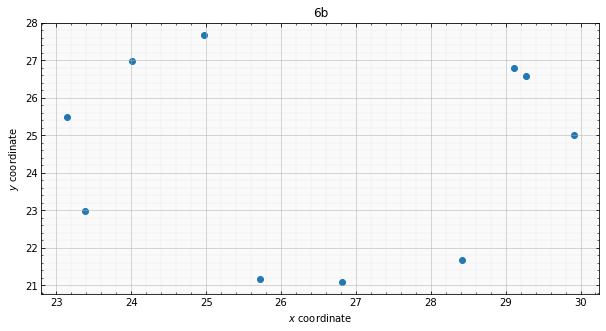

In [27]:
fid = plt.figure(figsize=(10,5))

Axes = plt.subplot(1,1,1)
Axes.axes.tick_params(which='both',direction='in',top=True, right=True)
plt.minorticks_on()
Axes.set_facecolor((0,0,0,0.02))
# draw the line

plt.scatter(points[0], points[1], label = 'points')
plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
plt.xlabel("$x$ coordinate")
plt.ylabel("$y$ coordinate")
# plt.legend(loc='upper right',fontsize='x-small')
plt.title('6b')
plt.savefig('/Users/gexueren/Desktop/6270/assignment/hw04/hw04/6b.png')

# Nesterov's method

In [28]:
def nesterov(p, alpha, maxiter, threshold):
    d = np.ones((2,10))
    k = 0
    pre_p = p
    pk = 0
    while (k < maxiter) and (np.linalg.norm(d) > threshold):
        beta = (k - 1) / (k + 2)
        for i in range(p.shape[1]):
            d[:, i] = - gradient(p + pk, i, 6)
        p = p + 4 * alpha * d + pk 
        pk = beta * (p - pre_p)
        k += 1
        pre_p = p
    print('final gradient is {}'.format(d[-1]))
    return p, k

In [30]:
# 1e-5? or 2e-5?
points, iterations = nesterov(p, 1e-5, 10000, 1e-5)
print('points and total iteration is {} and {}'.format(points, iterations))

final gradient is [-4.24993658e-07 -9.93206989e-07  2.25357539e-07 -8.69126961e-07
  7.49399355e-07  9.40595530e-07 -4.04110444e-07 -9.42647929e-07
 -7.56704054e-07  2.47543767e-06]
points and total iteration is [[26.23659913 26.89041826 25.82211139 23.44453593 29.11647637 23.21349477
  23.00993403 28.29602363 28.78743695 29.92110547]
 [21.08480148 21.10181235 27.9430185  26.22109203 22.30105432 23.37016435
  24.57999401 27.48687928 27.11897773 24.1999216 ]] and 4179


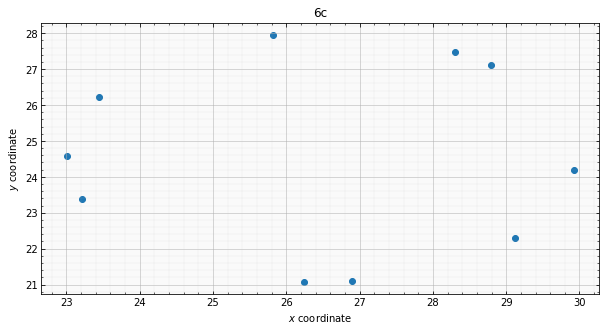

In [31]:
fid = plt.figure(figsize=(10,5))

Axes = plt.subplot(1,1,1)
Axes.axes.tick_params(which='both',direction='in',top=True, right=True)
plt.minorticks_on()
Axes.set_facecolor((0,0,0,0.02))
# draw the line

plt.scatter(points[0], points[1], label = 'points')
plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
plt.xlabel("$x$ coordinate")
plt.ylabel("$y$ coordinate")
# plt.legend(loc='upper right',fontsize='x-small')
plt.title('6c')
plt.savefig('/Users/gexueren/Desktop/6270/assignment/hw04/hw04/6c.png')